<a href="https://colab.research.google.com/github/mehrnazeraeisi/Wine/blob/main/Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#   مشاهده نمودارها برای هر درصد دلخواه
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def evaluate_knn_on_dataset(X_data, y_data, test_size=0.2, n_repeats=20):
    # مرحله 1: محاسبه Accuracy برای تک‌ویژگی‌ها
    def compute_acc_per_feature(X, y):
        feature_scores = []
        for feature in X.columns:
            model = KNeighborsClassifier()
            model.fit(X[[feature]], y)
            y_pred = model.predict(X[[feature]])
            acc=accuracy_score(y, y_pred)
            feature_scores.append((feature, acc))
        df_scores = pd.DataFrame(feature_scores, columns=['Feature', 'Accuracy'])
        return df_scores.sort_values(by='Accuracy', ascending=False)

    # مرحله 2: بررسی گروه‌های افزایشی ویژگی‌ها
    def evaluate_incremental_feature_groups(X, y, sorted_features):
        results = []
        best_acc = -np.inf
        best_group = []
        for k in range(1, len(sorted_features) + 1):
            group = sorted_features[:k]
            model = KNeighborsClassifier()
            model.fit(X[group], y)
            y_pred = model.predict(X[group])
            acc=accuracy_score(y, y_pred)
            results.append((k, acc))
            if acc > best_acc:
                best_acc = acc
                best_group = group
        # اضافه کردن All Features به لیست
        model.fit(X, y)
        y_pred = model.predict(X)
        all_acc = accuracy_score(y, y_pred)
        results.append(("All Features", all_acc))
        return pd.DataFrame(results, columns=["Group Size", "Accuracy"]), best_group

    # اجرای مراحل
    single_feat_df = compute_acc_per_feature(X_data, y_data)
    sorted_features = single_feat_df['Feature'].tolist()
    group_results_df, best_group = evaluate_incremental_feature_groups(X_data, y_data, sorted_features)

    # مرحله 3: چاپ نتایج اولیه
    print("📌 نتایج Accuracy برای هر ویژگی:")
    print(single_feat_df.to_string(index=False))

    print("\n📊 نتایج عملکرد گروه‌های افزایشی Accuracy:")
    print(group_results_df.to_string(index=False))

    best_acc = group_results_df[group_results_df["Group Size"] == len(best_group)]["Accuracy"].values[0]

    print("\n🏆 بهترین گروه:")
    print(f"📌 تعداد ویژگی‌ها: {len(best_group)}")
    print(f"🔹 Accuracy: {best_acc:.4f}")

    # مرحله 4: ارزیابی نهایی با Split و رسم نمودار
    acc_scores = {"all_features": [], "best_group": []}

    feature_groups = {
        "all_features": X_data.columns.tolist(),
        "best_group": best_group
    }

    for _ in range(n_repeats):
        X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)
        for group_name, group_features in feature_groups.items():
            model = KNeighborsClassifier()
            model.fit(X_train[group_features], y_train)
            y_pred = model.predict(X_test[group_features])
            acc_scores[group_name].append(accuracy_score(y_test, y_pred))

    # رسم نمودار Accuracy
    x = np.arange(1, n_repeats + 1)
    plt.figure(figsize=(8, 4))
    for name, acc in acc_scores.items():
        plt.plot(x, acc, label=f"{name.replace('_', ' ').title()} Accuracy", marker='o')
    plt.xlabel("Repeat")
    plt.ylabel("Accuracy")
    plt.title("KNN Classifier Accuracy Performance")
    plt.legend()
    plt.grid(True)
    plt.show()


    # چاپ نتایج نهایی میانگین
    print("\n📈 میانگین نتایج پس از تکرار:")
    for name in feature_groups:
        avg_acc = np.mean(acc_scores[name])
        print(f"{name.replace('_', ' ').title()} → Accuracy: {avg_acc:.4f}")


(178, 13)
📌 نتایج Accuracy برای هر ویژگی:
                     Feature  Accuracy
                  flavanoids  0.842697
             color_intensity  0.780899
od280/od315_of_diluted_wines  0.769663
                     proline  0.764045
                     alcohol  0.764045
                         hue  0.747191
               total_phenols  0.724719
                  malic_acid  0.713483
             proanthocyanins  0.674157
                   magnesium  0.640449
           alcalinity_of_ash  0.589888
        nonflavanoid_phenols  0.584270
                         ash  0.578652

📊 نتایج عملکرد گروه‌های افزایشی Accuracy:
  Group Size  Accuracy
           1  0.842697
           2  0.955056
           3  0.943820
           4  0.814607
           5  0.814607
           6  0.820225
           7  0.820225
           8  0.825843
           9  0.820225
          10  0.775281
          11  0.786517
          12  0.786517
          13  0.786517
All Features  0.786517

🏆 بهترین گروه:
📌 تعداد 

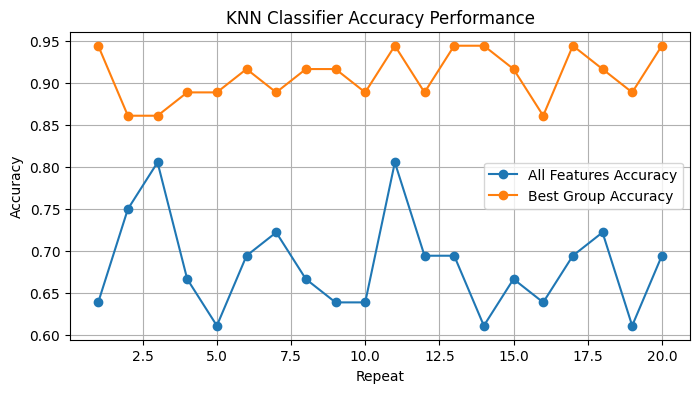


📈 میانگین نتایج پس از تکرار:
All Features → Accuracy: 0.6833
Best Group → Accuracy: 0.9083


In [6]:
# بارگذاری فایل
from sklearn.datasets import load_wine
# [3] Load Wine dataset
data = load_wine()


X = pd.DataFrame(data.data, columns=data.feature_names)
y= data.target


print(X.shape)


# اجرای تابع
evaluate_knn_on_dataset(X, y, test_size=0.2, n_repeats=20)



In [11]:
def knn_classification_results_table_from_xy(X_data, y_data, test_sizes=[0.1, 0.13, 0.16, 0.19, 0.25], n_repeats=20):
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    import pandas as pd
    import numpy as np

    feature_names = X_data.columns.tolist()

    # مرحله 1: محاسبه دقت (Accuracy) برای هر ویژگی
    scores = []
    for feature in feature_names:
        model = KNeighborsClassifier()
        model.fit(X_data[[feature]], y_data)
        y_pred = model.predict(X_data[[feature]])
        acc = accuracy_score(y_data, y_pred)
        scores.append((feature, acc))

    df_scores = pd.DataFrame(scores, columns=['Feature', 'Accuracy']).sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

    # مرحله 2: یافتن بهترین گروه ویژگی‌ها
    best_acc = -np.inf
    best_group = []
    for k in range(1, len(df_scores) + 1):
        group = df_scores['Feature'][:k].tolist()
        model = KNeighborsClassifier()
        model.fit(X_data[group], y_data)
        y_pred = model.predict(X_data[group])
        acc = accuracy_score(y_data, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_group = group

    # مرحله 3: اجرای آزمایش روی چند test size و تکرار
    detailed_results = []
    for ts in test_sizes:
        for repeat in range(1, n_repeats + 1):
            X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=ts)

            # مدل روی همه ویژگی‌ها
            model_all = KNeighborsClassifier()
            model_all.fit(X_train, y_train)
            y_pred_all = model_all.predict(X_test)
            acc_all = accuracy_score(y_test, y_pred_all)

            # مدل روی گروه ویژگی‌های منتخب
            model_best = KNeighborsClassifier()
            model_best.fit(X_train[best_group], y_train)
            y_pred_best = model_best.predict(X_test[best_group])
            acc_best = accuracy_score(y_test, y_pred_best)

            # ذخیره در جدول نتایج
            detailed_results.append({
                'Test Size': ts,
                'Repeat': repeat,
                'All_Accuracy': acc_all,
                'Best_Accuracy': acc_best
            })

    return pd.DataFrame(detailed_results)


In [12]:
import pandas as pd
from sklearn.datasets import load_wine


# [3] Load Wine dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target


# اجرای تابع جدول
df_result = knn_classification_results_table_from_xy(X, y)
print(df_result)


    Test Size  Repeat  All_Accuracy  Best_Accuracy
0        0.10       1      0.722222       0.888889
1        0.10       2      0.777778       0.944444
2        0.10       3      0.555556       1.000000
3        0.10       4      0.666667       0.777778
4        0.10       5      0.833333       1.000000
..        ...     ...           ...            ...
95       0.25      16      0.644444       0.933333
96       0.25      17      0.555556       0.933333
97       0.25      18      0.644444       0.844444
98       0.25      19      0.666667       0.911111
99       0.25      20      0.577778       0.888889

[100 rows x 4 columns]
